
Purpose
This notebook explores the cleaned healthcare insurance dataset to identify the key factors associated with higher insurance charges. It demonstrates how analytics supports evidence-based decision-making in an insurance context.

Target Audience
- Insurance pricing analysts
- Risk and underwriting teams
- Product managers evaluating cost drivers

 Business Requirements 
BR1. Understand the overall distribution of insurance charges and whether costs are concentrated among a minority of individuals.  
BR2. Assess whether smoking status is associated with significantly higher insurance charges.  
BR3. Identify how charges change with age and BMI (risk factors) and whether relationships appear linear or non-linear.  
BR4. Determine whether average charges differ by region (geographic factor).  
BR5. Identify correlations between numeric variables to support a data-driven view of relationships.

Hypotheses
H1. Smokers have higher insurance charges than non-smokers.  
H2. Insurance charges tend to increase with age.  
H3. Higher BMI is associated with higher insurance charges.  
H4. Average insurance charges vary by region, but differences are smaller than lifestyle factors such as smoking.

Inputs
- Cleaned dataset: dataset/cleaned/insurance_cleaned.csv

Outputs
- Descriptive statistics and grouped summaries
- At least four different plot types answering business requirements
- Correlation matrix and heatmap
- A predictive report and actionable insights
- Limitations and next-step recommendations


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../dataset/cleaned/insurance_cleaned.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1337 entries, 0 to 1336
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


Data Quality Check (from cleaned data)

This notebook uses the cleaned dataset produced in Notebook 1. The purpose here is to confirm basic integrity and ensure that analysis is based on an analysis-ready dataset.

In [4]:
df.isnull().sum()


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
df.duplicated().sum()


np.int64(0)

Feature Engineering for Analysis

To support interpretation and reporting, we derive simple grouped features:
- Age band (to summarise trends without assuming a perfectly linear effect)
- BMI band (to summarise cost differences at higher BMI levels)

These are used for reporting and a  predictive report .

In [6]:
df = df.copy()

# Age bands
df["age_band"] = pd.cut(
    df["age"],
    bins=[17, 25, 35, 45, 55, 65],
    labels=["18-25", "26-35", "36-45", "46-55", "56-65"]
)

# BMI bands
df["bmi_band"] = pd.cut(
    df["bmi"],
    bins=[0, 18.5, 25, 30, 100],
    labels=["Underweight", "Normal", "Overweight", "Obese"]
)

df[["age", "age_band", "bmi", "bmi_band"]].head()

,age,age_band,bmi,bmi_band
0,19,18-25,27.900,Overweight
1,18,18-25,33.770,Obese
2,28,26-35,33.000,Obese
3,33,26-35,22.705,Normal
4,32,26-35,28.880,Overweight


Descriptive Statistics 

This section provides quick, interpretable summaries for business decision-making.

In [7]:
# BR2: Charges by smoking status
df.groupby("smoker")["charges"].agg(["count", "mean", "median"]).sort_values("mean", ascending=False)

,count,mean,median
smoker,,,
yes,274,32050.231832,34456.34845
no,1063,8440.660307,7345.72660


In [8]:
# BR4: Average charges by region
df.groupby("region")["charges"].agg(["count", "mean", "median"]).sort_values("mean", ascending=False)

,count,mean,median
region,,,
southeast,364,14735.411438,9294.131950
northeast,324,13406.384516,10057.652025
northwest,324,12450.840844,8976.977250
southwest,325,12346.937377,8798.593000


In [9]:
# Charges by age band and smoker (helps BR2 & BR3)
df.pivot_table(values="charges", index="age_band", columns="smoker", aggfunc="mean")

/var/folders/ks/vklkz_h54qd1_dnzn_fkj9tc0000gn/T/ipykernel_15636/3670086312.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(values="charges", index="age_band", columns="smoker", aggfunc="mean")


smoker,no,yes
age_band,,
18-25,4013.775426,27933.556484
26-35,5796.844754,28281.653727
36-45,7822.872647,32364.540293
46-55,11692.787748,35145.248663
56-65,14087.584153,39512.996332


In [10]:
# Charges by BMI band and smoker (helps BR2 & BR3)
df.pivot_table(values="charges", index="bmi_band", columns="smoker", aggfunc="mean")


/var/folders/ks/vklkz_h54qd1_dnzn_fkj9tc0000gn/T/ipykernel_15636/3972781227.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  df.pivot_table(values="charges", index="bmi_band", columns="smoker", aggfunc="mean")


smoker,no,yes
bmi_band,,
Underweight,5485.056800,18809.824980
Normal,7734.650116,19942.223641
Overweight,8226.088675,22491.182935
Obese,8866.158926,41692.808992


Visualisations

Each plot below directly answers one or more business requirements.

Plot 1 (Histogram): BR1  
Plot 2 (Box plot): BR2  
Plot 3 (Scatter plot): BR3  
Plot 4 (Bar chart): BR4  
Plot 5 (Heatmap): BR5 

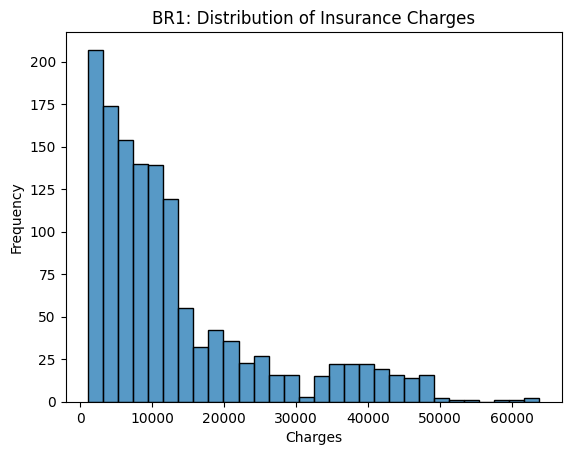

In [11]:
plt.figure()
sns.histplot(df["charges"], bins=30)
plt.title("BR1: Distribution of Insurance Charges")
plt.xlabel("Charges")
plt.ylabel("Frequency")
plt.show()

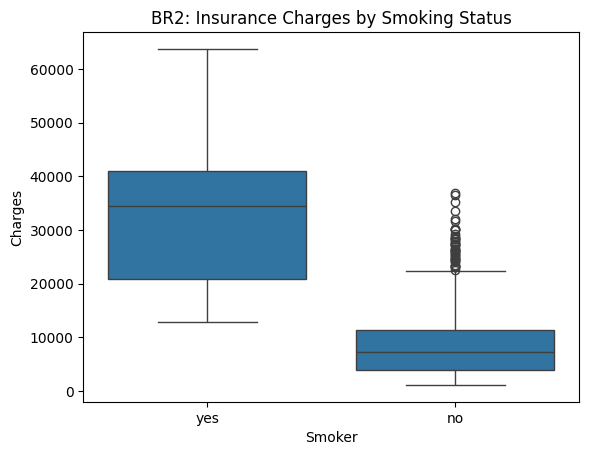

In [12]:
plt.figure()
sns.boxplot(x="smoker", y="charges", data=df)
plt.title("BR2: Insurance Charges by Smoking Status")
plt.xlabel("Smoker")
plt.ylabel("Charges")
plt.show()

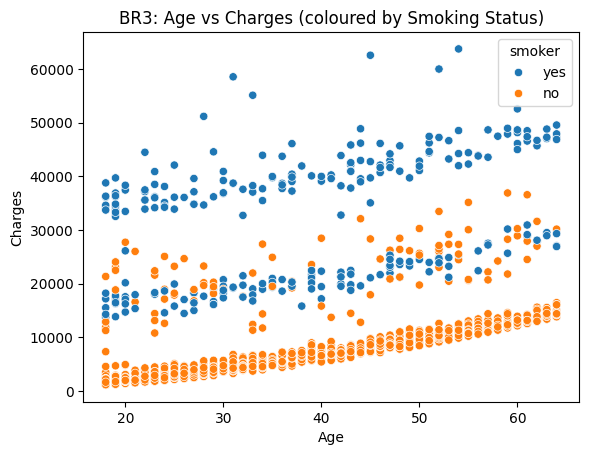

In [13]:
plt.figure()
sns.scatterplot(x="age", y="charges", hue="smoker", data=df)
plt.title("BR3: Age vs Charges (coloured by Smoking Status)")
plt.xlabel("Age")
plt.ylabel("Charges")
plt.show()

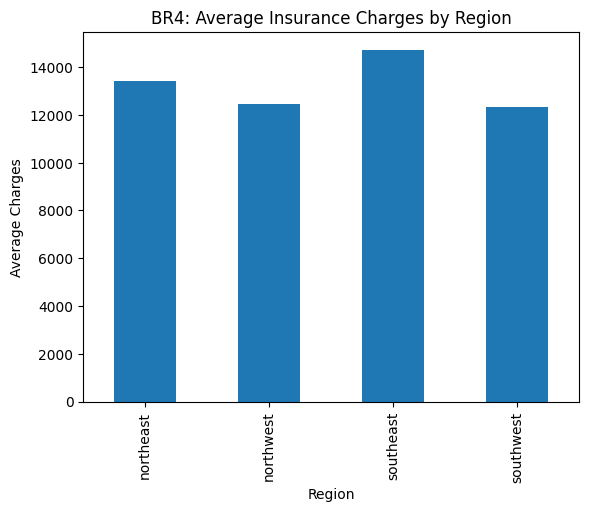

In [14]:
plt.figure()
df.groupby("region")["charges"].mean().plot(kind="bar")
plt.title("BR4: Average Insurance Charges by Region")
plt.xlabel("Region")
plt.ylabel("Average Charges")
plt.show()

Correlation Analysis

The brief requires identifying and visualising correlations between variables using a correlation matrix and heatmap.  
This section focuses on numeric variables to avoid misleading correlations from categorical labels.

In [15]:
numeric_cols = ["age", "bmi", "children", "charges"]
corr_matrix = df[numeric_cols].corr()
corr_matrix


,age,bmi,children,charges
age,1.000000,0.109344,0.041536,0.298308
bmi,0.109344,1.000000,0.012755,0.198401
children,0.041536,0.012755,1.000000,0.067389
charges,0.298308,0.198401,0.067389,1.000000


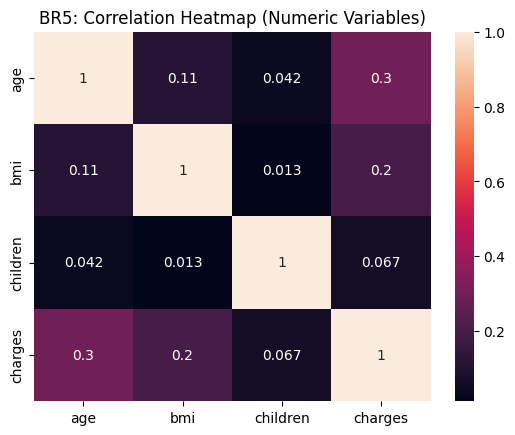

In [16]:
plt.figure()
sns.heatmap(corr_matrix, annot=True)
plt.title("BR5: Correlation Heatmap (Numeric Variables)")
plt.show()

Hypotheses Validation

This section evaluates each hypothesis using the descriptive summaries and plots above.

- H1 (Smokers have higher charges): validated if smoker group shows higher median/mean and the box plot shows clear separation.
- H2 (Charges increase with age): supported if scatter plot shows an upward trend and age-band averages increase.
- H3 (Higher BMI associated with higher charges): supported if BMI-band averages rise toward Overweight/Obese categories and scatter patterns suggest higher charges at higher BMI.
- H4 (Charges vary by region but weaker than smoking): supported if regional mean differences exist but are smaller than smoker vs non-smoker differences.

Key Findings (Evidence-Based)

- Charges are right-skewed (BR1): most policyholders have lower costs, with a smaller number of high-cost cases.
- Smoking status is strongly associated with higher charges (BR2): smokers show much higher central tendency and spread.
- Charges tend to increase with age (BR3): higher charges become more common as age increases; this is also reflected in age-band means.
- Region shows differences in average charges (BR4), but these differences are modest compared to smoker vs non-smoker gaps.
- Correlation analysis (BR5) indicates positive relationships between charges and key numeric risk factors (especially age and BMI).



Predictive Report

The purpose of this section is to demonstrate how patterns observed in the data can be used to anticipate insurance cost levels for different customer profiles.

This analysis uses:
	•	Observed averages and distributions from the dataset
	•	Segmentation based on known risk factors (age, BMI, smoking status)
	•	Transparent, interpretable logic




In [17]:
def assign_risk_segment(row):
    if row["smoker"] == "yes":
        if row["age"] >= 45 and row["bmi"] >= 30:
            return "Very High Risk"
        else:
            return "High Risk"
    else:
        if row["age"] < 30 and row["bmi"] < 25:
            return "Low Risk"
        elif row["age"] >= 50 or row["bmi"] >= 30:
            return "Medium Risk"
        else:
            return "Medium Risk"

df["risk_segment"] = df.apply(assign_risk_segment, axis=1)

df["risk_segment"].value_counts()


risk_segment
Medium Risk       984
High Risk         219
Low Risk           79
Very High Risk     55
Name: count, dtype: int64

In [18]:
risk_summary = (
    df.groupby("risk_segment")["charges"]
      .agg(
          count="count",
          mean="mean",
          median="median",
          min="min",
          max="max"
      )
      .sort_values("median", ascending=False)
)

risk_summary

,count,mean,median,min,max
risk_segment,,,,,
Very High Risk,55,46165.182619,46130.52650,39725.51805,63770.42801
High Risk,219,28505.381177,26109.32905,12829.45510,58571.07448
Medium Risk,984,8772.829440,7796.89775,1131.50660,36910.60803
Low Risk,79,4303.262496,2709.24395,1121.87390,25081.76784


In [19]:
risk_ranges = (
    df.groupby("risk_segment")["charges"]
      .quantile([0.25, 0.75])
      .unstack()
      .rename(columns={0.25: "lower_expected", 0.75: "upper_expected"})
)

risk_ranges

,lower_expected,upper_expected
risk_segment,,
High Risk,19518.754900,37217.65750
Low Risk,1784.735000,3790.14955
Medium Risk,4491.909787,11523.79305
Very High Risk,42913.345350,47696.64290


Based on the segmentation above, typical outcomes include:
- Younger non-smokers with a normal BMI generally fall into the Low Risk segment with lower expected charges.
- Non-smokers with higher BMI or older age typically fall into the Medium Risk segment.
- Smokers consistently fall into High Risk categories regardless of age.
- Older smokers with obesity are strongly associated with the Very High Risk segment and the highest observed charges.

These profiles demonstrate how insurers can anticipate cost exposure prior to final pricing decisions.

Actionable Business Insights
- Smoking status is the single strongest driver of insurance charges and should remain central to pricing decisions.
- Age and BMI materially increase costs but interact with smoking rather than acting independently.
- Regional differences exist but are modest compared to lifestyle-related risk factors.
- Simple, rule-based segmentation provides meaningful predictive value without introducing unnecessary model complexity.


Limitations of the Analysis
- The dataset is cross-sectional and does not capture changes over time.
- No clinical or medical history variables are included.
- Relationships observed are associative rather than causal.
- Predictions are based on historical group patterns rather than individual-level forecasts..


Recommendations and Next Steps
- Incorporate longitudinal data to assess how insurance costs evolve over time.
- Introduce additional health indicators where available.
- Compare this rule-based approach with machine learning models as a future enhancement.
- Use these insights to inform underwriting guidelines and customer risk communication.
